# Итоговая аттестация аналитик данных 

## 1. Исследовательский анализ данных 

1. Описание данных. Изучите их и расшифруйте письменно все столбцы в данных
2. Предобработка данных
3. Исследовательский анализ данных (EDA)
4. Построение дашборда (Выберите самое важное из EDA и составьте на его основе dashboard, прикрепите его в Ваш notebook)
5. Общий вывод о проделанной работе

### 1.1. Предварительный обзор и предобработка давнных

Набор данных, содержащий информацию о фильмах и сериалах всем известного интернет-кинотеатра Netflix

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from scipy import stats
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

In [2]:
# Загрузка данных
df = pd.read_csv('data/netflix1.csv')
#Вывод информации о наборе данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [3]:
# Проверка на дубликаты
print(f'В датасете {len(df) - len(df.drop_duplicates())} дубликатов строк')
# Проверка на пропущенные значения
df.isnull().sum()

В датасете 0 дубликатов строк


show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

В наборе данных нет дублирующий строк и пропущенных значений

In [4]:
#Первый взляд на данные
df.head(5)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [5]:
#посмотрим какие значения может принимать type
df.type.value_counts()

type
Movie      6126
TV Show    2664
Name: count, dtype: int64

In [6]:
#посмотрим какие значения может принимать rating
df.rating.value_counts()

rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

In [7]:
#посмотрим какие значения может принимать country
df.country.value_counts()

country
United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
                  ... 
Iran                 1
West Germany         1
Greece               1
Zimbabwe             1
Soviet Union         1
Name: count, Length: 86, dtype: int64

In [8]:
#посмотрим какие значения может принимать duration
df.duration.value_counts()

duration
1 Season      1791
2 Seasons      421
3 Seasons      198
90 min         152
97 min         146
              ... 
5 min            1
16 min           1
186 min          1
193 min          1
11 Seasons       1
Name: count, Length: 220, dtype: int64

In [9]:
#посмотрим  duration в разрезе типа контента
df_movies = df[df.type == 'Movie'] 
df_tv_show = df[df.type == 'TV Show'] 
print(df_movies.duration.value_counts())
df_tv_show.duration.value_counts()

duration
90 min     152
93 min     146
94 min     146
97 min     146
91 min     144
          ... 
208 min      1
5 min        1
16 min       1
186 min      1
312 min      1
Name: count, Length: 205, dtype: int64


duration
1 Season      1791
2 Seasons      421
3 Seasons      198
4 Seasons       94
5 Seasons       64
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       6
15 Seasons       2
13 Seasons       2
12 Seasons       2
17 Seasons       1
11 Seasons       1
Name: count, dtype: int64

In [10]:
#Проверю может ли продолжительность фильм измерятся в сезонах
df_movies.duration.str.contains('Season').sum()

0

In [11]:
#Создадим множество для типов жанров
genre_ = set()
for i in range(df.shape[0]):
    list_ = df['listed_in'][i].split(',') # Создаю список из строки
    set_ = {list_[n].strip() for n in range(len(list_))} #добавляю элемент без начальных пробелов списка в множество
    genre_.update(set_) 

print(f'В каталоге содержится {len(genre_)} жанров фильмов и телешоу:')
genre_


В каталоге содержится 42 жанров фильмов и телешоу:


{'Action & Adventure',
 'Anime Features',
 'Anime Series',
 'British TV Shows',
 'Children & Family Movies',
 'Classic & Cult TV',
 'Classic Movies',
 'Comedies',
 'Crime TV Shows',
 'Cult Movies',
 'Documentaries',
 'Docuseries',
 'Dramas',
 'Faith & Spirituality',
 'Horror Movies',
 'Independent Movies',
 'International Movies',
 'International TV Shows',
 "Kids' TV",
 'Korean TV Shows',
 'LGBTQ Movies',
 'Movies',
 'Music & Musicals',
 'Reality TV',
 'Romantic Movies',
 'Romantic TV Shows',
 'Sci-Fi & Fantasy',
 'Science & Nature TV',
 'Spanish-Language TV Shows',
 'Sports Movies',
 'Stand-Up Comedy',
 'Stand-Up Comedy & Talk Shows',
 'TV Action & Adventure',
 'TV Comedies',
 'TV Dramas',
 'TV Horror',
 'TV Mysteries',
 'TV Sci-Fi & Fantasy',
 'TV Shows',
 'TV Thrillers',
 'Teen TV Shows',
 'Thrillers'}

Набор данных содержит 8790 строк и 10 столбцов со следующей инфомацией:
- show_id - уникальный идетификатор фильма (телешоу) в формате 'sчисло' (тип данных - object)
- type - тип контента (тип данных - object). Может примимать значения:
    - Movie - фильм;
    - TV Show - телешоу.
- title - название фильма (телешоу) (тип данных - object)
- director - режиссер (тип данных - object)
- country - страна происхождения(тип данных - object) 
    - страна происхождения известна не для всех фильмов, есть значение **Not Given**
- date_added - дата добавления в каталог Netflix (тип данных - object)
- release_year - год выхода в прокат фильма (телешоу) (тип данных - int64)
- rating - возрастное ограничение фильма (телешоу) - (тип данных - object).  Может примимать значения:
    - TV-MA — Эта программа предназначена для просмотра взрослыми и поэтому может не подходить для детей младше 17 лет;
    - TV-Y — Эта программа предназначена для очень юной аудитории, в том числе для детей от 2 до 6 лет;
    - TV-Y7 — Эта программа предназначена для детей от 7 лет и старше;
    - TV-Y7-FV — Эта программа демонстрируют больше «фантастического насилия», которое может быть более интенсивным или боевым, чем другие программы с рейтингом TV-Y7;
    - TV-G обычно подходят для всех возрастов;
    - TV-PG — Рекомендуется родительское руководство; эти программы могут быть неподходящими для детей младшего возраста.
    - PG-13 — Детям до 13 лет просмотр не желателен;
    - PG – кино разрешённое для просмотра всем, но маленьким детям рекомендуется просмотр с родителями;
    - NC-17 – зрители до 18 не допускаются (в названии «17» потому что включительно);
    - R – зрители до 17 лет должны присутствовать в зале с сопровождением родителей;
    - G – кино без всяких возрастных ограничений;
    - NR - нет рейтинга;
    - UR - фильм вышедший в прокат до введения системы рейтингов, то есть до 1 ноября 1968 года.
- duration - продолжительность  (тип данных - object).  Может примимать значения:
    - для фильма в минутах;
    - для телешою в сезонах.
- listed_in - жанры фильма (телешоу) (тип данных - object). Может примимать значения:
    - список из жанров фильма (всего в каталоге 42 жанра)


Для удобства провдения исследовательского анализа набора данных:
- поменяю тип данных **date_added** 
- создам столбец **duration_temp** с типом данных **int64** с продолжителностью в минутах для фильмов и количеством сезонов для телешоу

In [12]:
#Меняю тип данных в date_added
df.date_added = df.date_added.astype("datetime64[ns]")
#Вставляю  столбец
df.insert(9, 'duration_temp', 0 , allow_duplicates = False)
#Заполняю столбец минутами для фильмов и количеством сезонов для телешоу
for i in range(df.shape[0]):
    list_ = df.duration[i].split(' ')
    df.loc[i,'duration_temp'] = int(list_[0])

### 1.2. Исследовательский анализ данных (EDA)

Сравню количество контента по типам

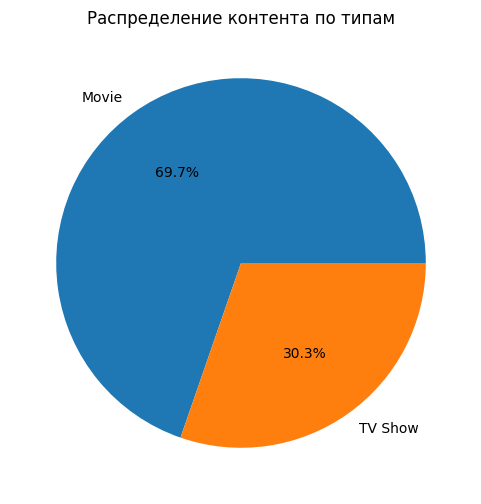

In [13]:
# Визуализация распределения контента по типам
df_ = df.groupby(by ='type')[['type']].value_counts()
fig, ax =  plt.subplots(1, figsize = [15, 6])
ax.pie(df_.values, labels = df_.index, autopct = '%1.1f%%')
ax.set_title('Распределение контента по типам')
plt.show();

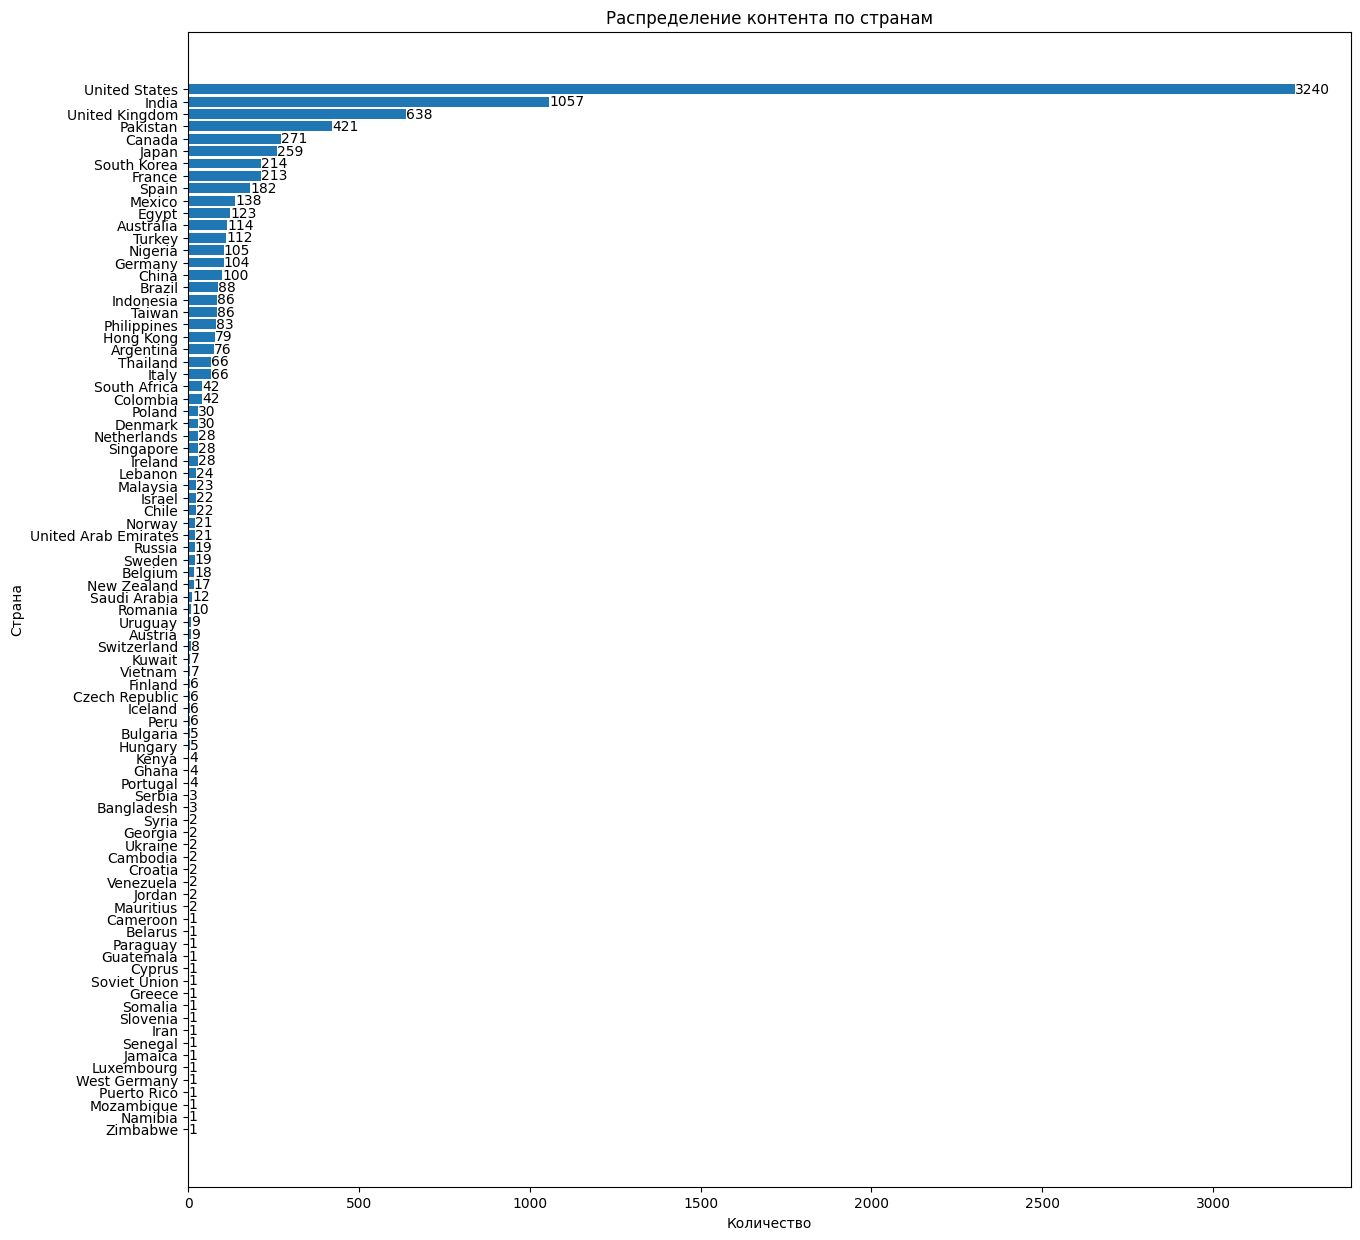

In [14]:
# Визуализация распределения контента по странам
df_ = df[df.country != 'Not Given'].groupby(by ='country')[['country']].value_counts().sort_values()
fig, ax =  plt.subplots(1, figsize = [15, 15])
ax.barh(y = df_.index, width = df_.values) 
ax.set_title('Распределение контента по странам')
ax.set_ylabel('Страна')
ax.set_xlabel('Количество')
ax.bar_label (ax.containers [ 0 ])
plt.show();

In [15]:
# Топ 10 стран по количеству контента
df[df.country != 'Not Given'].groupby(by ='country')[['country']].value_counts().sort_values(ascending=False).head(10)

country
United States     3240
India             1057
United Kingdom     638
Pakistan           421
Canada             271
Japan              259
South Korea        214
France             213
Spain              182
Mexico             138
Name: count, dtype: int64

In [16]:
# Российский контент
df[df.country == 'Russia']

,show_id,type,title,director,country,date_added,release_year,rating,duration,duration_temp,listed_in
1137,s1171,Movie,Secret Magic Control Agency,Aleksey Tsitsilin,Russia,2021-03-25,2021,TV-Y7,105 min,105,"Children & Family Movies, Comedies"
1611,s1881,TV Show,To the Lake,Pavel Kostomarov,Russia,2020-10-07,2020,TV-MA,1 Season,1,"International TV Shows, TV Dramas, TV Mysteries"
3256,s4473,Movie,Dovlatov,Aleksey German,Russia,2018-10-26,2018,PG-13,126 min,126,"Dramas, International Movies"
4947,s6822,Movie,Gagarin: First in Space,Pavel Parkhomenko,Russia,2017-09-15,2013,TV-14,108 min,108,"Dramas, International Movies"
5027,s6926,Movie,Hardcore Henry,Ilya Naishuller,Russia,2020-08-01,2015,R,96 min,96,"Action & Adventure, International Movies, Sci-..."
6603,s154,TV Show,Kid-E-Cats,Not Given,Russia,2021-09-01,2016,TV-Y,2 Seasons,2,Kids' TV
6678,s523,TV Show,Larva,Not Given,Russia,2021-07-06,2015,TV-Y7,3 Seasons,3,"Kids' TV, Korean TV Shows, TV Comedies"
7259,s2584,TV Show,Masha and the Bear,Not Given,Russia,2020-05-01,2019,TV-Y,4 Seasons,4,Kids' TV
7586,s3578,TV Show,Better Than Us,Not Given,Russia,2019-08-16,2019,TV-MA,1 Season,1,"Crime TV Shows, International TV Shows, TV Dramas"
7794,s4144,TV Show,Sparta,Not Given,Russia,2019-02-01,2018,TV-MA,1 Season,1,"Crime TV Shows, International TV Shows, TV Dramas"


In [17]:
# Советский  контент
df[df.country == 'Soviet Union']

,show_id,type,title,director,country,date_added,release_year,rating,duration,duration_temp,listed_in
3669,s5080,Movie,Alibaba Aur 40 Chor,"Latif Faiziyev, Umesh Mehra",Soviet Union,2018-01-15,1980,TV-14,147 min,147,"Action & Adventure, International Movies, Sci-..."


In [18]:
#Создам наборы данных из фильмов и телешоу
df_movies = df[df.type == 'Movie'] 
df_tv_show = df[df.type == 'TV Show'] 

Проанализурую списки жанров для контента

In [19]:
print ('Топ 10 списков жанров характеризующих контент')
df.groupby(by ='listed_in')[['listed_in']].value_counts().sort_values(ascending = False).head(10)

Топ 10 списков жанров характеризующих контент


listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            219
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Name: count, dtype: int64

In [20]:
print ('Топ 10 списков жанров для фильмов')
df_movies.groupby(by ='listed_in')[['listed_in']].value_counts().sort_values(ascending = False).head(10)

Топ 10 списков жанров для фильмов


listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Comedies, International Movies                      176
Name: count, dtype: int64

In [21]:
print ('Топ 10 списков жанров для телешоу')
df_tv_show.groupby(by ='listed_in')[['listed_in']].value_counts().sort_values(ascending = False).head(10)

Топ 10 списков жанров для телешоу


listed_in
Kids' TV                                                  219
International TV Shows, TV Dramas                         121
Crime TV Shows, International TV Shows, TV Dramas         110
Kids' TV, TV Comedies                                      97
Reality TV                                                 95
International TV Shows, Romantic TV Shows, TV Comedies     94
International TV Shows, Romantic TV Shows, TV Dramas       90
Anime Series, International TV Shows                       87
Docuseries                                                 84
TV Comedies                                                68
Name: count, dtype: int64

Проанализую жанры контента по частоте упоминания в спсиках жанров

In [22]:
#Функция создания датасета содержащего топ 10 количество контента в каждом жанр
def genre_def (df):
    global top10
    df_genre = pd.DataFrame({
    'genre':[],
    'number_of_content':[],
    })
    for i in genre_:
        dict_genre_free = {}
        dict_genre_free['genre'] = i
        dict_genre_free['number_of_content'] = len(df[df.listed_in.str.contains(i)])
        df_genre.loc[len(df_genre)] = dict_genre_free
    top10 = df_genre.nlargest(10, 'number_of_content')[['genre', 'number_of_content']]
    top10.index = np.arange(1, len(top10) + 1)
    return    

In [23]:
genre_def(df)
print ('Топ 10 упоминания жанров в характеристиках контента')
top10

Топ 10 упоминания жанров в характеристиках контента


,genre,number_of_content
1,Movies,4498
2,Dramas,3188
3,International Movies,2752
4,Comedies,2247
5,TV Shows,1751
6,International TV Shows,1349
7,Action & Adventure,1026
8,Documentaries,869
9,TV Dramas,762
10,Independent Movies,756


In [24]:
genre_def(df_movies)
print ('Топ 10 упоминания жанров в характеристиках фильмов')
top10

Топ 10 упоминания жанров в характеристиках фильмов


,genre,number_of_content
1,Movies,4498
2,International Movies,2752
3,Dramas,2426
4,Comedies,1674
5,Documentaries,869
6,Action & Adventure,859
7,Independent Movies,756
8,Children & Family Movies,641
9,Romantic Movies,616
10,Thrillers,577


In [25]:
genre_def(df_tv_show)
print ('Топ 10 упоминания жанров в характеристиках телешоу')
top10

Топ 10 упоминания жанров в характеристиках телешоу


,genre,number_of_content
1,TV Shows,1751
2,International TV Shows,1349
3,Dramas,762
4,TV Dramas,762
5,Comedies,573
6,TV Comedies,573
7,Crime TV Shows,469
8,Kids' TV,448
9,Docuseries,394
10,Romantic TV Shows,370


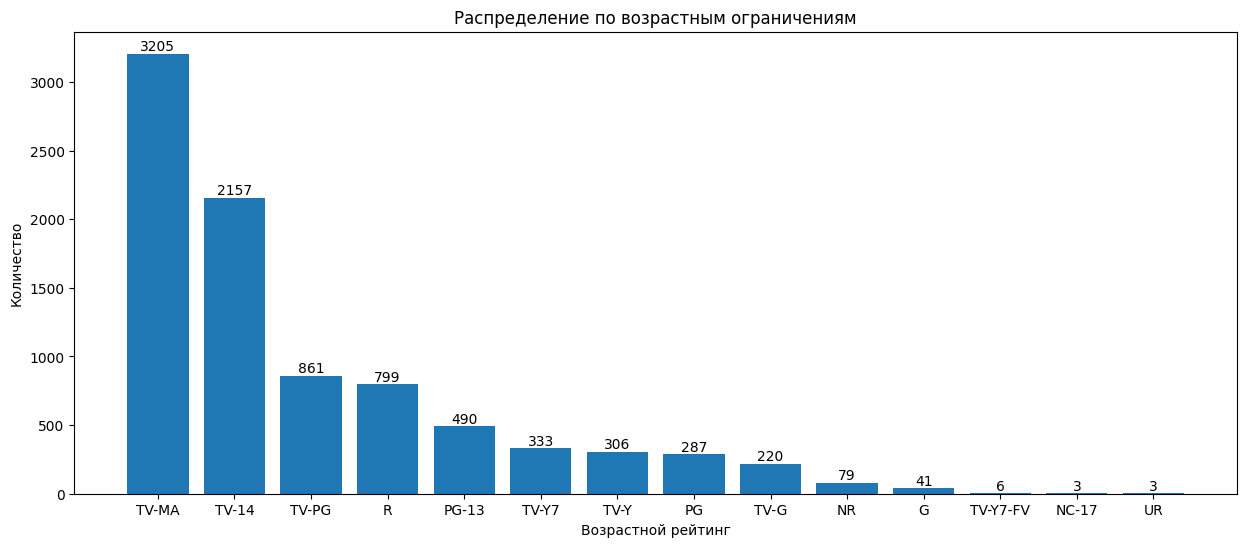

In [26]:
# Визуализация распределения контента по возрастным ограничениям
df_ = df.groupby(by ='rating')[['rating']].value_counts().sort_values(ascending = False)
fig, ax =  plt.subplots(1, figsize = [15, 6])
ax.bar(x = df_.index, height = df_.values) 
ax.set_title('Распределение по возрастным ограничениям')
ax.set_ylabel('Количество')
ax.set_xlabel('Возрастной рейтинг')
ax.bar_label (ax.containers [ 0 ])
plt.show();

In [27]:
# Топ 10 режиссеров по количеству контента
df.groupby(by ='director')[['director']].value_counts().sort_values(ascending = False).head(10)

director
Not Given                 2588
Rajiv Chilaka               20
Alastair Fothergill         18
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Martin Scorsese             12
Youssef Chahine             12
Name: count, dtype: int64

Режиссеры 2588 произведений неизвесны

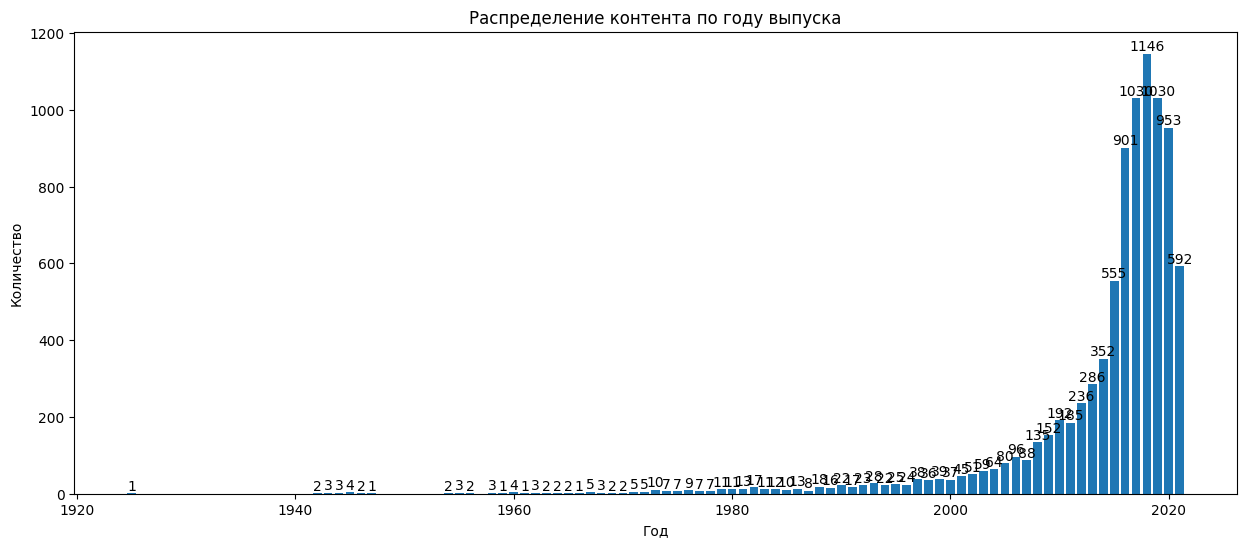

In [28]:
# Визуализация распределения количества контента по году выпуска
df_= df.groupby(by ='release_year')[['release_year']].value_counts().sort_values()
df_.head()
fig, ax =  plt.subplots(1, figsize = [15, 6])
ax.bar(x = df_.index, height = df_.values) 
ax.set_title('Распределение контента по году выпуска')
ax.set_ylabel('Количество')
ax.set_xlabel('Год')
ax.bar_label (ax.containers [ 0 ])
plt.show();

In [29]:
print(f'В наборе данных представлены фильмы и телешоу с {df.release_year.min()} года по {df.release_year.max()} год')
print('Топ 10 лет по количеству контента')
df_.sort_values(ascending=False).head(10)


В наборе данных представлены фильмы и телешоу с 1925 года по 2021 год
Топ 10 лет по количеству контента


release_year
2018    1146
2019    1030
2017    1030
2020     953
2016     901
2021     592
2015     555
2014     352
2013     286
2012     236
Name: count, dtype: int64

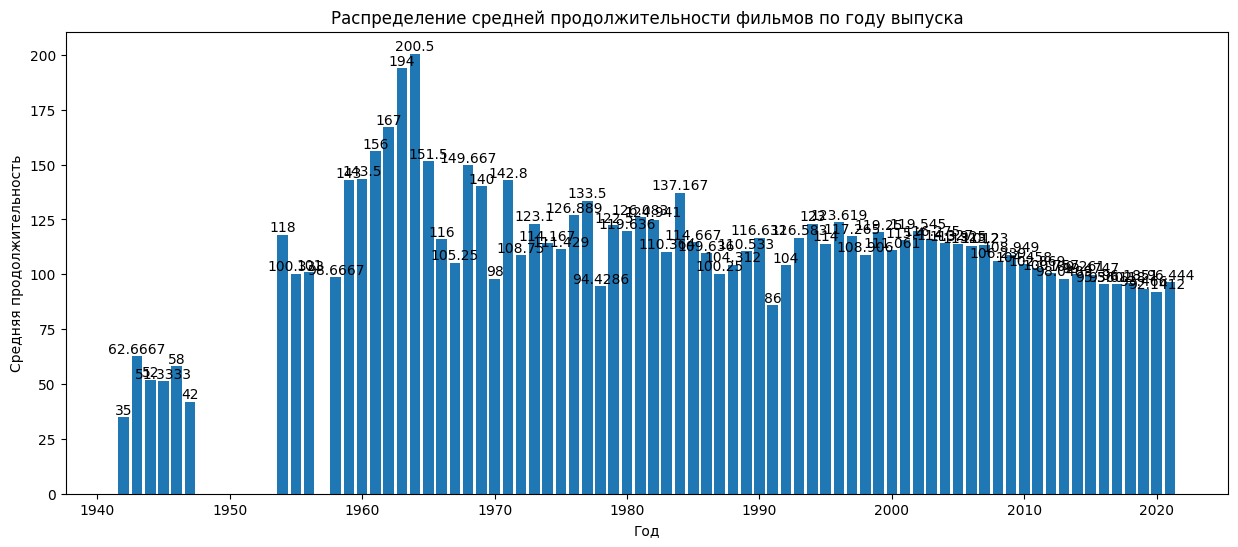

In [30]:
# Визуализация распределения средней продолжительности фильмов по году выпуска
df_= df_movies.groupby(by ='release_year')['duration_temp'].mean()
fig, ax =  plt.subplots(1, figsize = [15, 6])
ax.bar(x = df_.index, height = df_.values) 
ax.set_title('Распределение средней продолжительности фильмов по году выпуска')
ax.set_ylabel('Средняя продолжительность')
ax.set_xlabel('Год')
ax.bar_label (ax.containers [ 0 ])
plt.show();

Медианная продолжительность = 98.0
Средняя продолжительность = 99.58488410055502


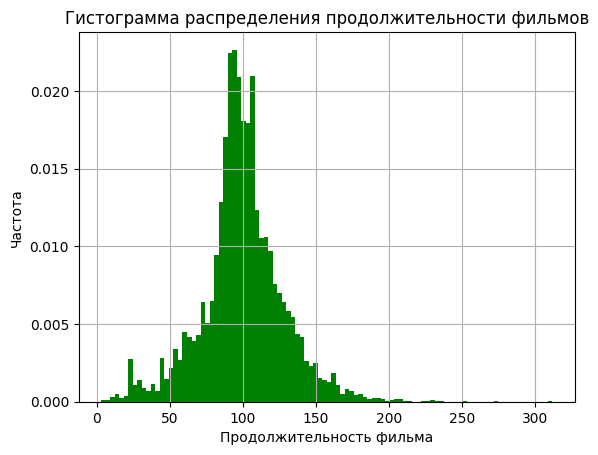

In [31]:
print(f'Медианная продолжительность = {df_movies.duration_temp.median()}')
print(f'Средняя продолжительность = {df_movies.duration_temp.mean()}')

# Гитограмма продолжительности фильмов
n, bins, patches = plt.hist(df_movies.duration_temp, 100, density = True, facecolor = 'g')
plt.xlabel('Продолжительность фильма')
plt.ylabel('Частота')
plt.title('Гистограмма распределения продолжительности фильмов')
plt.grid(True)
plt.show();

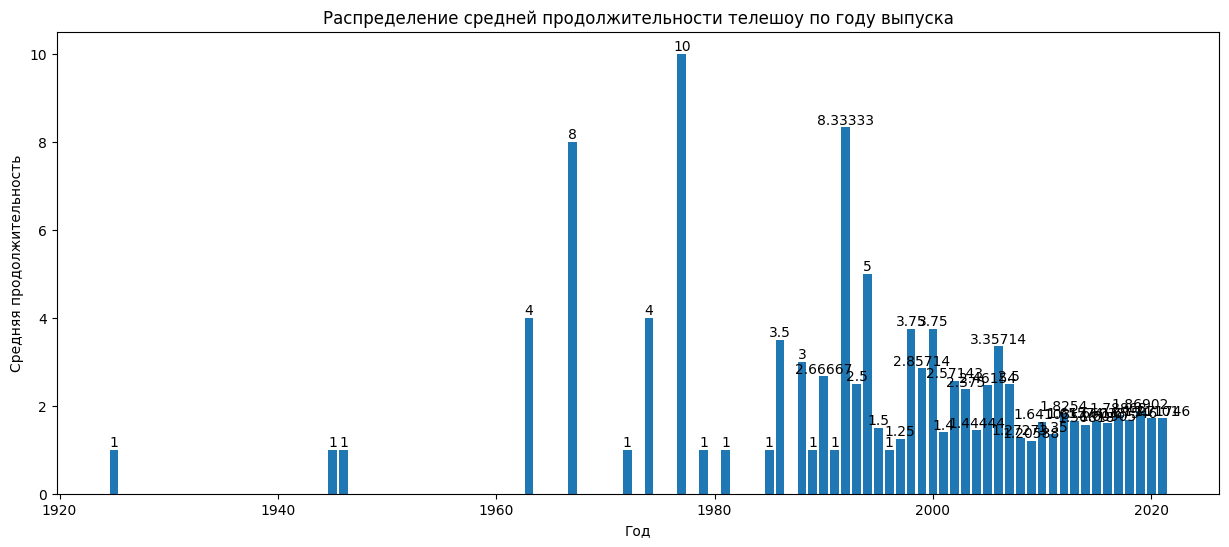

In [32]:
# Визуализация распределения средней продолжительности телешоу по году выпуска
df_= df_tv_show.groupby(by ='release_year')['duration_temp'].mean()
fig, ax =  plt.subplots(1, figsize = [15, 6])
ax.bar(x = df_.index, height = df_.values) 
ax.set_title('Распределение средней продолжительности телешоу по году выпуска')
ax.set_ylabel('Средняя продолжительность')
ax.set_xlabel('Год')
ax.bar_label (ax.containers [ 0 ])
plt.show();

In [33]:
print('Топ 10 фильмов по самой большой продолжительности:')
top = df_movies.nlargest(10, 'duration_temp')[['title', 'duration_temp']]
top.index = np.arange(1, len(top) + 1)
top

Топ 10 фильмов по самой большой продолжительности:


,title,duration_temp
1,Black Mirror: Bandersnatch,312
2,Headspace: Unwind Your Mind,273
3,The School of Mischief,253
4,No Longer kids,237
5,Lock Your Girls In,233
6,Raya and Sakina,230
7,Once Upon a Time in America,229
8,Sangam,228
9,Lagaan,224
10,Jodhaa Akbar,214


In [34]:
print('Топ 10 фильмов по самой маленькой продолжительности:')
top = df_movies.nsmallest(10, 'duration_temp')[['title', 'duration_temp']]
top.index = np.arange(1, len(top) + 1)
top

Топ 10 фильмов по самой маленькой продолжительности:


,title,duration_temp
1,Silent,3
2,Sol Levante,5
3,Cops and Robbers,8
4,Canvas,9
5,American Factory: A Conversation with the Obamas,10
6,Calico Critters: Everyone's Big Dream Flying i...,11
7,Calico Critters: A Town of Dreams,11
8,Besieged Bread,12
9,Cosmos Laundromat: First Cycle,12
10,Zion,12


In [35]:
print('Топ 10 телешоу по продолжительности :')
top = df_tv_show.nlargest(10, 'duration_temp')[['title', 'duration_temp']]
top.index = np.arange(1, len(top) + 1)
top

Топ 10 телешоу по продолжительности :


,title,duration_temp
1,Grey's Anatomy,17
2,Supernatural,15
3,NCIS,15
4,Heartland,13
5,COMEDIANS of the world,13
6,Trailer Park Boys,12
7,Criminal Minds,12
8,Cheers,11
9,The Walking Dead,10
10,Stargate SG-1,10


In [36]:
# Сохранение очищенного датасета в csv
df.to_csv (r'data/clear_netflix.csv', index= False )

## Визуализация в Superset

![Визулизация в SUPERSET](data/superset_ia.jpg "Визулизация в SUPERSET")

## Выводы по первому заданию

В наборе данных представлены фильмы и ТВ-шоу с 1925 года по 2021 год
- Фильмы - 69.7%
- ТВ-шоу - 30.3%

Большинство контента в каталоге имеет возастное ограничение TV-MA — предназначена для просмотра взрослыми 

Лидерами среди стран по количеству контента представленному в каталоге являются:
- United States - 3240
- India - 1057
- United Kingdom - 638

В каталоге есть 5 фильмов и 14 сериалов произведенных в России и один советский фильм - "Алибаба и 40 разбойников" 1980 года

Всего в каталоге 42 жанра контента. Конкретному фильму или ТВ-шоу может соответствовать один или несколько жанров (список жанров)

Топ 3 списков жанров для фильмов

- Dramas, International Movies - 362
- Documentaries - 359
- Stand-Up Comedy - 334

Топ 3 списков жанров для телешоу

- Kids' TV - 219
- International TV Shows, TV Dramas - 121
- Crime TV Shows, International TV Shows, TV Dramas - 110

Топ 10 упоминания жанров в характеристиках фильмов

- Movies	4498
- International Movies	2752
- Dramas	2426
- Comedies	1674
- Documentaries	869

Топ 10 упоминания жанров в характеристиках телешоу

- TV Shows - 1751
- International TV Shows	1349
- TV Dramas	762
- Dramas	762
- TV Comedies	573

Режиссеры 2588 произведений неизвестны. Среди известных больше всего фильмов сняли:
- Rajiv Chilaka               20
- Alastair Fothergill         18
- Raúl Campos, Jan Suter      18
- Suhas Kadav                 16
- Marcus Raboy                16
- Jay Karas                   14
- Cathy Garcia-Molina         13
- Martin Scorsese             12
- Youssef Chahine             12

Топ 3 лет по количеству контента

- 2018 - 1146
- 2019 - 1030
- 2017 - 1030

Средняя продолжительность фильмов = 99.58 мин

Самый длинный фильм - Чёрное зеркало: Брандашмыг - 312 мин

Самый короткий фильм НЕМОЙ (Silent)  - 3 минуты

Самый блинный сериал - Анатомияя страсти - 17 сезонов

# 2. Статистический анализ

Компания по продаже кухонных гарнитуров решила добавить 3D визуализацию своей продукции с целью увеличения конверсии. Нашей задачей будет узнать эффективность нового функционала и провести A/B тестирование с предоставленными компанией данными

Необходимо провести A/B тестирование для представленного датасета.

- Визуализация данных
- t-test
- Тесты Хи-квадрат
- Бутстрап анализ
- Конверсии групп
- Анализ доверительного интервала
- Вывод по итогу эксперимента

### Изучение и предобработка данных

In [37]:
# Загрузка данных
df = pd.read_csv('data/ab_data.csv')
df.sample(5)

,user_id,timestamp,group,landing_page,converted
253959,631905,2017-01-16 23:28:25.989849,control,old_page,0
173448,730354,2017-01-19 03:46:10.990063,treatment,new_page,0
292352,717723,2017-01-03 11:40:57.119834,control,old_page,1
279212,790383,2017-01-22 22:42:16.819086,treatment,new_page,0
19811,676309,2017-01-05 16:26:22.341868,treatment,new_page,0


In [38]:
#Просмотр информации о наборе данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


- Столбец timestamp имеет не верный тип данных
- Пропуски в ячейках отсутствую

In [39]:
# Проверка на дубликаты
print(f'В датасете {len(df) - len(df.drop_duplicates())} дубликатов строк')

В датасете 0 дубликатов строк


In [40]:
df.describe(include = 'all')

,user_id,timestamp,group,landing_page,converted
count,294478.000000,294478,294478,294478,294478.000000
unique,NaN,294478,2,2,NaN
top,NaN,2017-01-21 22:11:48.556739,treatment,old_page,NaN
freq,NaN,1,147276,147239,NaN
mean,787974.124733,NaN,NaN,NaN,0.119659
std,91210.823776,NaN,NaN,NaN,0.324563
min,630000.000000,NaN,NaN,NaN,0.000000
25%,709032.250000,NaN,NaN,NaN,0.000000
50%,787933.500000,NaN,NaN,NaN,0.000000
75%,866911.750000,NaN,NaN,NaN,0.000000


Набор данных имеет 5 столбцов: 
- user_id - уникальный идентификатор пользователя;
- timestamp - время посещения страницы пользователем;
- group - группы на которые поделены пользователи: control - контрольная, treatment - экспериментальная;
- landing_page - страница которую посетил пользователь: old_page для контрольной группы, new_page для экспериментальной группы;
- converted - информация о наличии конверсии: 1 - есть, 0 - нет.

Наиболее часто встречающиеся значния в столбце group - treatment, а в столбце landing_page - old_page. В корректных данных такого не может быть, т.к. группе treatment соответствует страница new_page. Следовательно в данных есть ошибки. Найду их.

In [41]:
#Проверю соответствие страниц группам
df_ = df.groupby(by='group')[['landing_page']].value_counts()
df_

group      landing_page
control    old_page        145274
           new_page          1928
treatment  new_page        145311
           old_page          1965
Name: count, dtype: int64

In [42]:
#Процент ошибочных строк
percentage_of_errors = round((df_.values[1] + df_.values[3]) / df.shape[0] * 100, 2)
print(f'В наборе данных {percentage_of_errors} % строк с ошибками')

В наборе данных 1.32 % строк с ошибками


В наборе данных есть 1.32 % строк с несоответствием страниц группам. Учитывая маленький процент ошибок эти строки можно удалить

In [43]:
#Удаляю строки
df = df[((df.group == 'control') & (df.landing_page == 'old_page')) | 
        ((df.group == 'treatment') & (df.landing_page == 'new_page'))]

In [44]:
# Меняю тип данных на datetime и оставляю только дату
df['timestamp'] = df['timestamp'].astype("datetime64[ns]").dt.date

### A/B тестирование

In [45]:
#Создам датафреймы для каждой группы
df_control = df[(df.group == 'control')]
df_treatment = df[(df.group == 'treatment')]

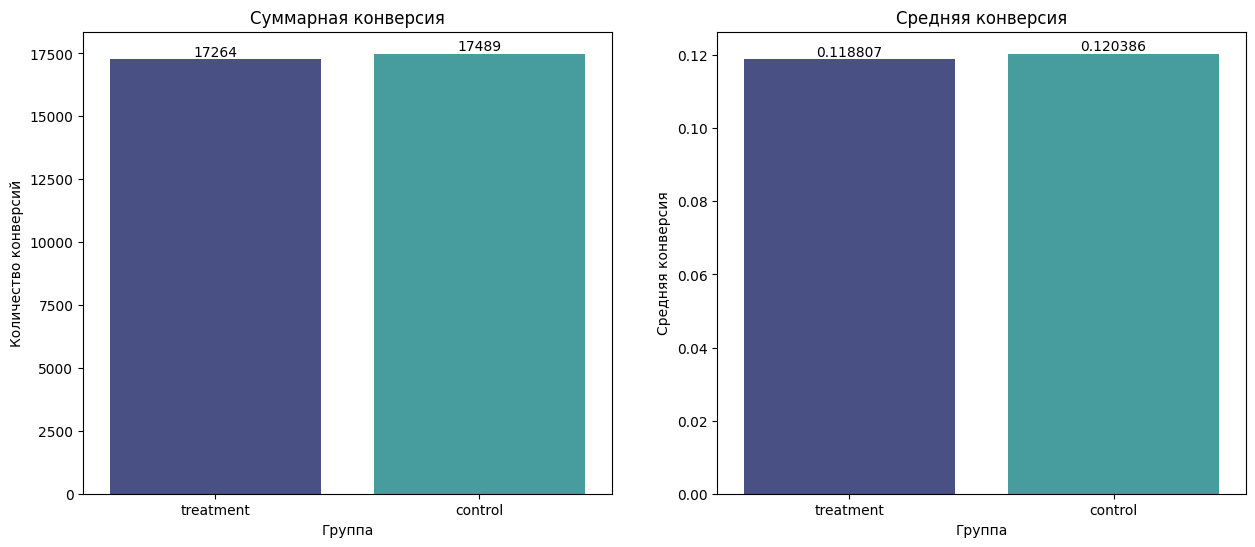

In [46]:
# Визуализация суммарных и средних конверсий по группам
fig, ax =  plt.subplots(1, 2, figsize = [15, 6])
sns.barplot(x = ['treatment', 'control'], y = [df_treatment.converted.sum(), 
                                               df_control.converted.sum()], palette="mako", ax = ax[0])
sns.barplot(x = ['treatment', 'control'], y = [df_treatment.converted.mean(), 
                                               df_control.converted.mean()], palette="mako", ax = ax[1])
ax[0].set_title('Суммарная конверсия')
ax[1].set_title('Средняя конверсия')
ax[0].set_ylabel('Количество конверсий')
ax[1].set_ylabel('Средняя конверсия')
ax[0].set_xlabel('Группа')
ax[1].set_xlabel('Группа')

ax[0].bar_label(ax[0].containers[0], fontsize = 10)
ax[0].bar_label(ax[0].containers[1], fontsize = 10)
ax[1].bar_label(ax[1].containers[0], fontsize = 10)
ax[1].bar_label(ax[1].containers[1], fontsize = 10)

plt.show();

Конверсии почти не отличаются, но в экспериментальной группе она немного меньше

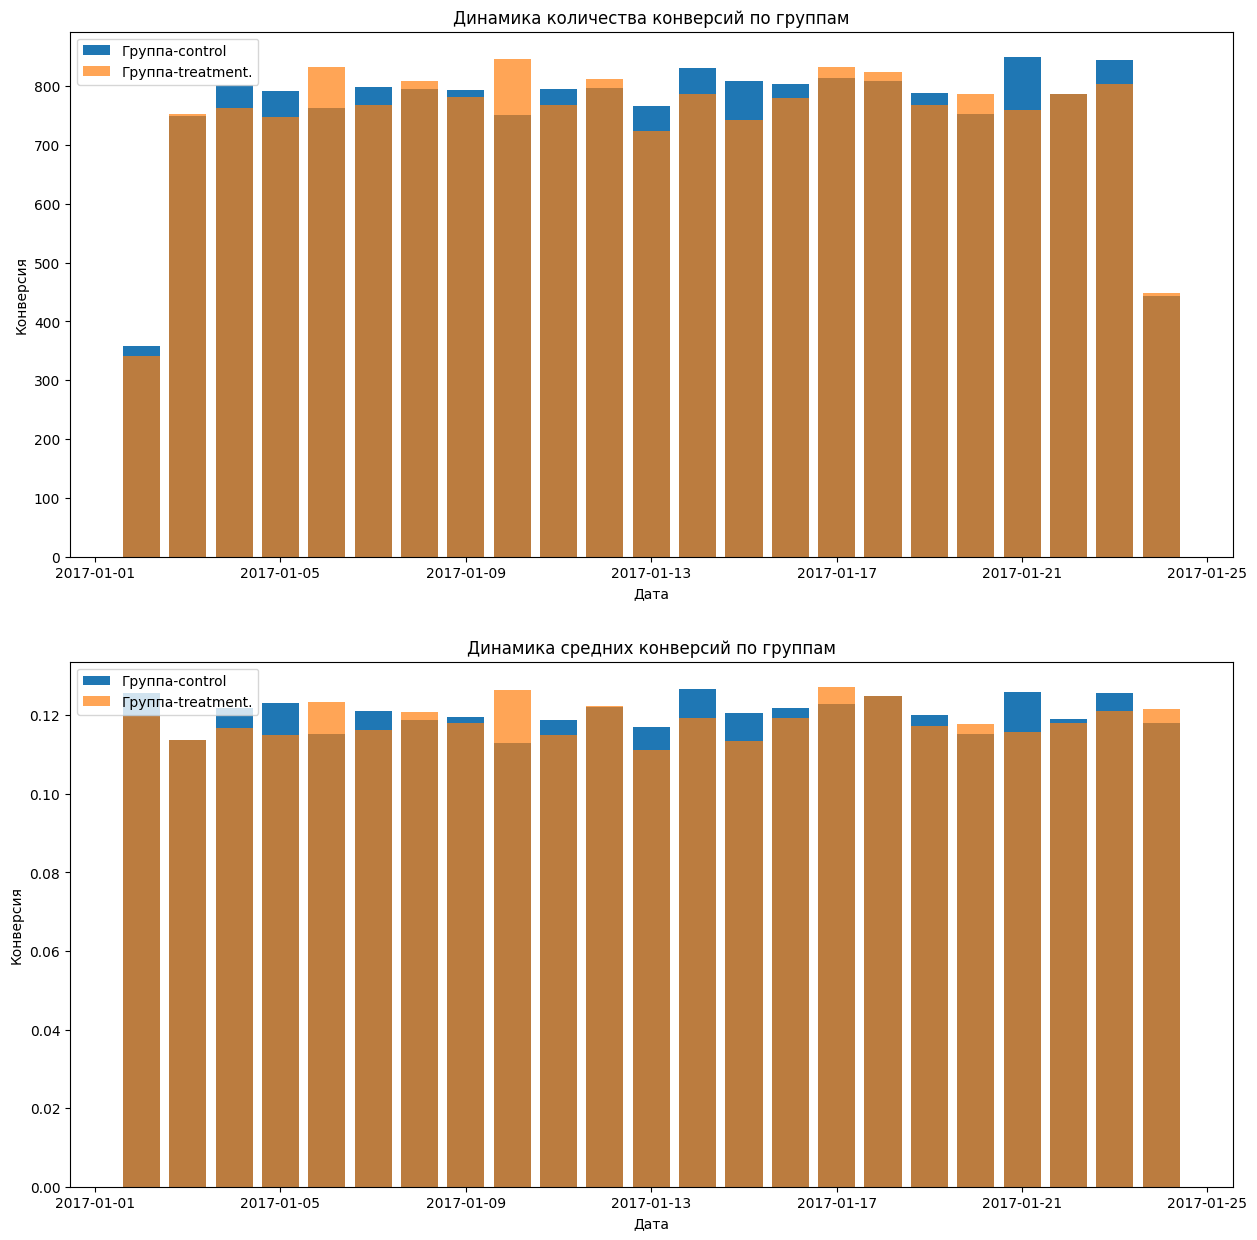

In [47]:
# Визуализация динамики конверсий

conversion_by_control = df_control.groupby(['timestamp'])['converted'].sum()
conversion_by_treatment = df_treatment.groupby(['timestamp'])['converted'].sum()
mean_conversion_by_control = df_control.groupby(['timestamp'])['converted'].mean()
mean_conversion_by_treatment = df_treatment.groupby(['timestamp'])['converted'].mean()


fig, ax =  plt.subplots(2, 1, figsize = [15, 15]) 


ax[0].bar(x = conversion_by_control.index, 
          height = conversion_by_control.values, label = 'Группа-control')
ax[0].bar(x = conversion_by_treatment.index, 
          height = conversion_by_treatment.values, alpha = 0.7, label = 'Группа-treatment.')
ax[1].bar(x = mean_conversion_by_control.index, 
          height = mean_conversion_by_control.values, label = 'Группа-control')
ax[1].bar(x = mean_conversion_by_treatment.index, 
          height = mean_conversion_by_treatment.values, alpha = 0.7, label = 'Группа-treatment.')
ax[0].set_title('Динамика количества конверсий по группам')
ax[1].set_title('Динамика средних конверсий по группам')
ax[0].set_ylabel('Конверсия')
ax[1].set_ylabel('Конверсия')
ax[0].set_xlabel('Дата')
ax[1].set_xlabel('Дата')
ax[0].legend()
ax[1].legend()
plt.show();

Визуально явные отличия конверсий определить проблематично

In [48]:
# T-тест для сравнения средних значений конверсий в тестовых группах
alpha = 0.05 #Уровень значимости
# Функция для для t-теста и вывода стаитистической значимости
def result_ttest (group_1, group_2):
    _, p_value = ttest_ind(group_1, group_2)
    negative = f' P-значение = {p_value}. \n Статистически значимых различий между группами не найдено'
    positive = f' P-значение = {p_value}. \n Обнаружены статистически значимые различия между группами'
    if p_value > alpha:
        return negative
    else:
        return positive

In [49]:
print(f'Для средних значений конверсии контрольной и экспериментальной групп \
      {result_ttest(mean_conversion_by_control, mean_conversion_by_treatment)}')


Для средних значений конверсии контрольной и экспериментальной групп        P-значение = 0.18931462543655247. 
 Статистически значимых различий между группами не найдено


In [50]:
# Выполняем тест Хи-квадрат
contingency_table = pd.crosstab(df['group'], df['converted'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)
print("\nРезультаты теста Хи-квадрат:")
print(f"Статистика Хи-квадрат = {chi2}")
print(f"p-значение = {p_value}")


Результаты теста Хи-квадрат:
Статистика Хи-квадрат = 1.7053502645115002
p-значение = 0.19158976298516003


t-тест и тест Хи-квадрат  не дают доказательств, чтобы отвергнуть нулевую гипотезу о равенстве средних конверси двух совокупностей двух групп. Т.е. нельзя достоверно сказать, что отличие конверсий не случайно.

Проведу Бутстрап анализ

In [51]:
# Определяем функцию для расчета средних значений bootstrap
def bootstrap_means(data, n_bootstrap_samples=1000):
    bootstrap_sample_means = []
    for _ in range(n_bootstrap_samples):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_sample_means.append(bootstrap_sample.mean())
    return bootstrap_sample_means

# Рассчитываем средние значения bootstrap для каждой группы
bootstrap_means_control = bootstrap_means(df[df['group'] == 'control']['converted'])
bootstrap_means_treatment = bootstrap_means(df[df['group'] == 'treatment']['converted'])

In [52]:
print(f'Для средних значений конверсии контрольной и экспериментальной групп после Бутстрап\
      {result_ttest(bootstrap_means_control, bootstrap_means_treatment)}')

Для средних значений конверсии контрольной и экспериментальной групп после Бутстрап       P-значение = 6.108408857300185e-261. 
 Обнаружены статистически значимые различия между группами


In [53]:
# коэффициент конверсии
conv_bootstrap_control = 100*sum(bootstrap_means_control)/(len(bootstrap_means_control))
conv_bootstrap_treatment = 100*sum(bootstrap_means_treatment)/(len(bootstrap_means_treatment))

conv_treatment = df_treatment.converted.sum() / df_treatment.shape[0] * 100
conv_control = df_control.converted.sum() / df_control.shape[0] * 100

print(f'коэффициент конверсии для котрольной группы {conv_control}, для экспериментальной {conv_treatment}')
print(f'коэффициент конверсии после Бутстрап для котрольной группы {conv_bootstrap_control}, для экспериментальной {conv_bootstrap_treatment}')

коэффициент конверсии для котрольной группы 12.03863045004612, для экспериментальной 11.880724790277405
коэффициент конверсии после Бутстрап для котрольной группы 12.035211393642355, для экспериментальной 11.884977049225446


In [54]:
confidence_level = .95 #Уровень доврерия 95%
level_importance = 1 - confidence_level #Уровень значимости
#Функация для доверительного интервала
def result_bound_interval (group):
      n = len(group) # Размер выборки
      mean_group = np.mean(group) #Среднее
      standard_deviation = np.std(group, ddof = 1) #Стандартное отклонение для выборки 
      standart_error = standard_deviation/(n**.5) #Стандартная ошибка
      critic_z  = np.abs(stats.t.ppf(level_importance / 2, n - 1)) #Критическое значение z
      lower_bound_interval = mean_group - standart_error * critic_z #Нижняя граница доверительного интревала
      upper_bound_interval = mean_group + standart_error * critic_z #Верхняя граница доверительного интревала
      return lower_bound_interval, upper_bound_interval, mean_group, standart_error, critic_z

In [55]:
#Расчет доверительных интервалов
a = result_bound_interval(mean_conversion_by_control)
b = result_bound_interval(mean_conversion_by_treatment)
c = result_bound_interval(bootstrap_means_control)
d = result_bound_interval(bootstrap_means_treatment)
print(f'Среднее значение конверсии для конрольной группы до Бутстрап с вероятностью 95% находится в диапазоне \n \
      от {a[0]:.4f} до {a[1]:.4f}')
print(f'Среднее значение конверсии для конрольной группы после Бутстрап с вероятностью 95% находится в диапазоне \n \
      от {c[0]:.4f} до {c[1]:.4f}')
print(f'Среднее значение конверсии для экспериментальной группы до Бутстрап с вероятностью 95% находится в диапазоне \n \
      от {b[0]:.4f} до {b[1]:.4f}')
print(f'Среднее значение конверсии для экспериментальной группы после Бутстрап с вероятностью 95% находится  \n \
       в диапазоне от {d[0]:.4f} до {d[1]:.4f}')

Среднее значение конверсии для конрольной группы до Бутстрап с вероятностью 95% находится в диапазоне 
       от 0.1188 до 0.1222
Среднее значение конверсии для конрольной группы после Бутстрап с вероятностью 95% находится в диапазоне 
       от 0.1203 до 0.1204
Среднее значение конверсии для экспериментальной группы до Бутстрап с вероятностью 95% находится в диапазоне 
       от 0.1171 до 0.1207
Среднее значение конверсии для экспериментальной группы после Бутстрап с вероятностью 95% находится  
        в диапазоне от 0.1188 до 0.1189


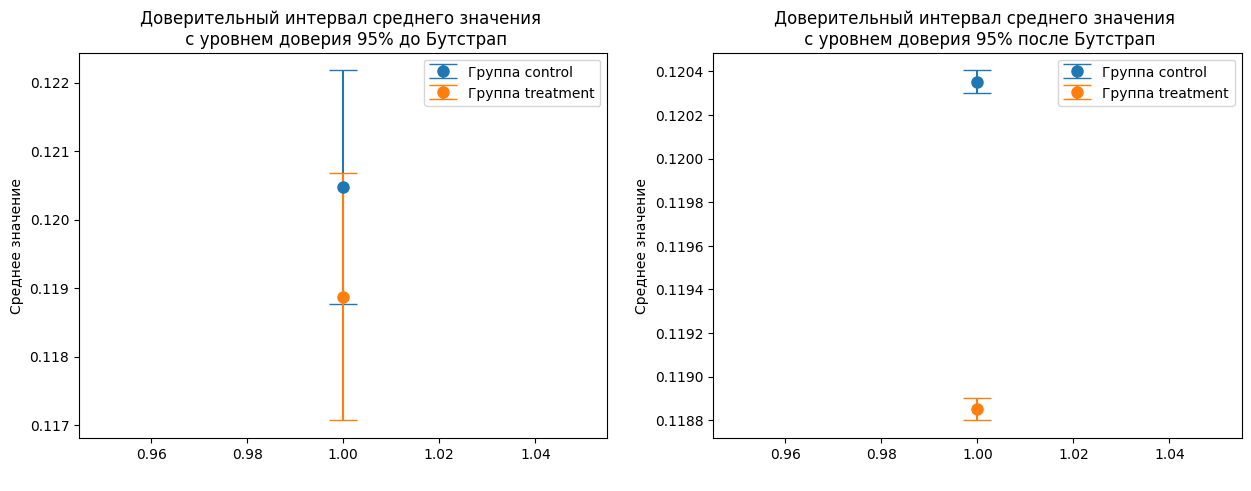

In [56]:
#Визаулизация доверительного интервала
fig, ax =  plt.subplots(1, 2, figsize = [15, 5]) 

ax[0].errorbar(1, a[2], a[3] * a[4], fmt = 'o', markersize = 8, capsize = 10, label = 'Группа control')
ax[0].errorbar(1, b[2], b[3] * b[4], fmt = 'o', markersize = 8, capsize = 10, label = 'Группа treatment')
ax[1].errorbar(1, c[2], c[3] * c[4], fmt = 'o', markersize = 8, capsize = 10, label = 'Группа control')
ax[1].errorbar(1, d[2], d[3] * d[4], fmt = 'o', markersize = 8, capsize = 10, label = 'Группа treatment')

ax[0].set_title('Доверительный интервал среднего значения \n с уровнем доверия 95% до Бутстрап')
ax[1].set_title('Доверительный интервал среднего значения \n с уровнем доверия 95% после Бутстрап')
ax[0].set_ylabel('Среднее значение')
ax[1].set_ylabel('Среднее значение')
ax[0].set_xlabel(' ')
ax[1].set_xlabel(' ')

ax[0].legend()
ax[1].legend()
plt.show();

## Выводы по первому заданию

Добавление 3D визуализацию продукции с целью увеличения конверсии не сработало, конверсия наоборот незначительно снизилась. 

При определении статистической значимости результатов А\В теста на имеющихся выборках результат не был достигнут.

Статистическая значимость результатов А\В теста была доказана с помощью бутстрап анализа и визаулизирована с помощью доверительных интервалов